In [3]:
import json
import numpy as np 

from matplotlib import pyplot as plt 
file_head = '../Baselines/EnemyPositionPrediction/checkpoints'
Res_tensor_loss = '/RES_tensor/all/loss.json'
Res_tensor_map_loss = '/RES_tensor_map/all/loss.json'
Res_tensor_vector_loss = '/RES_tensor_vector/all/loss.json'
CNN_GRU_loss = '/CNN_GRU_5_1/all/loss.json'

with open(file_head + Res_tensor_loss,'r') as f:
    Res_tensor_loss_file = json.load(f)
with open(file_head + Res_tensor_map_loss,'r') as f:
    Res_tensor_map_loss_file = json.load(f)
with open(file_head + Res_tensor_vector_loss,'r') as f:
    Res_tensor_vector_loss_file = json.load(f)
with open(file_head + CNN_GRU_loss,'r') as f:
    CNN_GRU_loss_file = json.load(f)




In [4]:
def smooth(data_np, n_point=1000):
#     weight=np.ones(n_point)/n_point
    last = np.ones(n_point-1)*data_np[0]
    data_np = np.concatenate((last,data_np),axis=0)
    smoothed = []
    for index in range(len(data_np)-n_point+1):
        
        smoothed_val = data_np[index:index+n_point].mean()
        smoothed.append(smoothed_val)
    return np.array(smoothed)


In [88]:
Res_tensor_record_loss_mean, \
Res_tensor_record_loss, \
Res_tensor_record_loss_step, \
Res_tensor_record_acc,\
Res_tensor_record_acc_step = smooth(np.array(Res_tensor_loss_file['record_loss'])), \
                            np.array(Res_tensor_loss_file['record_loss']),\
                            np.arange(len(Res_tensor_loss_file['record_loss_step'])),\
                            np.array(Res_tensor_loss_file['record_acc']), \
                            np.arange(len(Res_tensor_loss_file['record_acc_step']))

Res_tensor_map_record_loss_mean, \
Res_tensor_map_record_loss, \
Res_tensor_map_record_loss_step, \
Res_tensor_map_record_acc,\
Res_tensor_map_record_acc_step = smooth(np.array(Res_tensor_map_loss_file['record_loss'])), \
                            np.array(Res_tensor_map_loss_file['record_loss']),\
                            np.arange(len(Res_tensor_map_loss_file['record_loss_step'])),\
                            np.array(Res_tensor_map_loss_file['record_acc']), \
                            np.arange(len(Res_tensor_map_loss_file['record_acc_step']))

Res_tensor_vector_record_loss_mean, \
Res_tensor_vector_record_loss, \
Res_tensor_vector_record_loss_step, \
Res_tensor_vector_record_acc,\
Res_tensor_vector_record_acc_step = smooth(np.array(Res_tensor_vector_loss_file['record_loss'])), \
                            np.array(Res_tensor_vector_loss_file['record_loss']),\
                            np.arange(len(Res_tensor_vector_loss_file['record_loss_step'])),\
                            np.array(Res_tensor_vector_loss_file['record_acc']), \
                            np.arange(len(Res_tensor_vector_loss_file['record_acc_step']))

CNN_GRU_record_loss_mean, \
CNN_GRU_record_loss, \
CNN_GRU_record_loss_step, \
CNN_GRU_record_acc,\
CNN_GRU_record_acc_step = smooth(np.array(CNN_GRU_loss_file['record_loss'])), \
                            np.array(CNN_GRU_loss_file['record_loss']),\
                            np.arange(len(CNN_GRU_loss_file['record_loss_step'])),\
                            np.array(CNN_GRU_loss_file['record_acc']), \
                            np.arange(len(CNN_GRU_loss_file['record_acc_step']))


# 这些数据个数不同，为便于比较，找到这些数据相同的索引
# min_index1 = min(len(Res_tensor_record_loss_step), \
#                 len(Res_tensor_map_record_loss_step),\
#                 len(Res_tensor_vector_record_loss_step)
#                )
print(len(Res_tensor_record_loss_step), \
                len(Res_tensor_map_record_loss_step),\
                len(Res_tensor_vector_record_loss_step),\
               len(CNN_GRU_record_loss_step))

min_index2 = np.arange(len(CNN_GRU_record_loss_step))
min_index1 = np.arange(2*len(CNN_GRU_record_loss_step))


min_index_acc1 = min( len(Res_tensor_record_acc_step), \
                     len(Res_tensor_map_record_acc_step))

print( len(Res_tensor_record_acc_step), \
                     len(Res_tensor_map_record_acc_step))
min_index_acc1 = np.arange(min_index_acc1)    
min_index_acc2 = min(len(Res_tensor_vector_record_acc_step),\
               len(CNN_GRU_record_acc_step))
print(len(Res_tensor_vector_record_acc_step),\
               len(CNN_GRU_record_acc_step))
min_index_acc2 = np.arange(min_index_acc2)


60046 60046 60046 26817
433 433
13828 8128


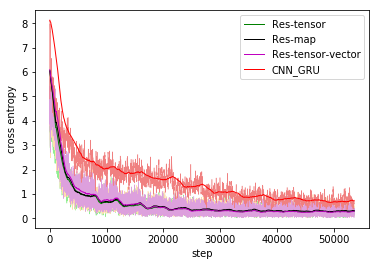

In [89]:

fig = plt.figure()
# plt.title("Mean loss of training") 
plt.xlabel("step") 
plt.ylabel("cross entropy") 

plt.plot(min_index1,Res_tensor_record_loss[min_index1], color = 'lightgreen',linewidth=0.5)
plt.plot(min_index1,Res_tensor_map_record_loss[min_index1], color = 'navajowhite',linewidth=0.5) 
plt.plot(min_index1,Res_tensor_vector_record_loss[min_index1], color = 'plum',linewidth=0.5) 
plt.plot(min_index2 * 2,CNN_GRU_record_loss[min_index2], color = 'lightcoral',linewidth=0.5) 


plt.plot(min_index1,Res_tensor_record_loss_mean[min_index1], label='Res-tensor', color = 'g',linewidth=1) 
plt.plot(min_index1,Res_tensor_map_record_loss_mean[min_index1], label='Res-map', color = 'k',linewidth=1) 
plt.plot(min_index1,Res_tensor_vector_record_loss_mean[min_index1], label='Res-tensor-vector', color = 'm',linewidth=1) 
plt.plot(min_index2 * 2,CNN_GRU_record_loss_mean[min_index2], label='CNN_GRU', color = 'r',linewidth=1) 


plt.legend()
plt.show()
fig.savefig('loss.png',format='png')
fig.savefig('loss.eps',format='eps')

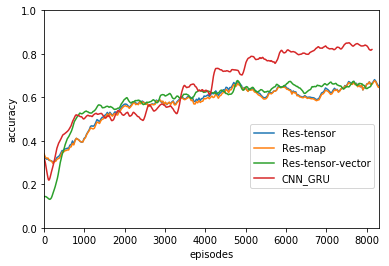

In [90]:

fig = plt.figure()
# plt.title("Mean accuracy of training") 
plt.xlabel("episodes") 
plt.ylabel("accuracy") 
plt.plot(min_index_acc1 * 32,Res_tensor_record_acc[min_index_acc1], label='Res-tensor') 
plt.plot(min_index_acc1 * 32,Res_tensor_map_record_acc[min_index_acc1], label='Res-map') 
plt.plot(min_index_acc2,smooth(Res_tensor_vector_record_acc[min_index_acc2], 100), label='Res-tensor-vector') 
plt.plot(min_index_acc2,smooth(CNN_GRU_record_acc[min_index_acc2], 100), label='CNN_GRU') 

plt.axis([0, 8300, 0, 1])
plt.legend(loc='upper center', bbox_to_anchor=(0.8,0.5),ncol=1,fancybox=True,shadow=False)
# plt.legend()
plt.show()
fig.savefig('acc.png',format='png')
fig.savefig('acc.eps',format='eps')

In [91]:
import pickle
import numpy as np 
from matplotlib import pyplot as plt 

file_head = '../Baselines/EnemyPositionPrediction/checkpoints'
Res_tensor_result = '/RES_tensor/all/test/test_result'
Res_tensor_map_result = '/RES_tensor_map/all/test/test_result'
Res_tensor_vector_result = '/RES_tensor_vector/all/test/test_result'
CNN_GRU_result = '/CNN_GRU/all/test/test_result'


with open(file_head + Res_tensor_result,'rb') as f:
    Res_tensor_result_file = pickle.load(f)
with open(file_head + Res_tensor_map_result,'rb') as f:
    Res_tensor_map_result_file = pickle.load(f)
with open(file_head + Res_tensor_vector_result,'rb') as f:
    Res_tensor_vector_result_file = pickle.load(f)
with open(file_head + CNN_GRU_result,'rb') as f:
    CNN_GRU_result_file = pickle.load(f)

Res_tensor_path = '/RES_tensor/all/test/path_list'
Res_tensor_map_path = '/RES_tensor_map/all/test/path_list'
Res_tensor_vector_path = '/RES_tensor_vector/all/test/path_list'
CNN_GRU_path = '/CNN_GRU/all/test/path_list'

with open(file_head + Res_tensor_path,'rb') as f:
    Res_tensor_path_file = pickle.load(f)
with open(file_head + Res_tensor_map_path,'rb') as f:
    Res_tensor_map_path_file = pickle.load(f)
with open(file_head + Res_tensor_vector_path,'rb') as f:
    Res_tensor_vector_path_file = pickle.load(f)
with open(file_head + CNN_GRU_path,'rb') as f:
    CNN_GRU_path_file = pickle.load(f)


In [22]:
def get_max_acc(result_file, path_file, offset=0):
    acc_n = []
    for dic in result_file:
        acc = [[] for _ in range(7)]
        for piece in range(6):
            action_pre=dic['action_pre_per_replay'][piece]
            action_gt = dic['action_gt_per_replay'][piece]
            for action_pre_per_replay, action_gt_per_replay in zip(action_pre, action_gt):
                acc_per_replay = np.mean(action_pre_per_replay[offset:] == action_gt_per_replay[offset:])
                acc[piece].append(acc_per_replay)

        for piece in range(6):
            acc[piece] = np.array(acc[piece]).mean()
        acc[6] = np.array(acc[:6]).mean()
        acc_n.append(acc)
    acc_n = np.array(acc_n)    
    max_row = np.argmax(acc_n[:,-1])
    print(path_file[max_row])
    ##################################
    steps = 10
    dic_max = result_file[max_row]
    
    acc_n_step = []
    action_pre_result, action_gt_result = [[] for _ in range(steps)], [[] for _ in range(steps)]
    for piece in range(6):
        action_pre = dic_max['action_pre_per_replay'][piece]
        action_gt = dic_max['action_gt_per_replay'][piece]
        for action_pre_per_replay, action_gt_per_replay in zip(action_pre, action_gt):
            if len(action_pre_per_replay[offset:]) < steps:
                continue

            step = len(action_pre_per_replay[offset:]) // steps
            for s in range(steps):
                action_pre_result[s].append(action_pre_per_replay[offset:][s * step:(s + 1) * step])
                action_gt_result[s].append(action_gt_per_replay[offset:][s * step:(s + 1) * step])

        X = np.arange(steps)
        Y = np.zeros(steps)
        for idx, (action_pres, action_gts) in enumerate(zip(action_pre_result, action_gt_result)):

            action_pres_np = np.hstack(action_pres)
            action_gts_np = np.hstack(action_gts)

            Y[idx] = np.mean(action_pres_np == action_gts_np)
        acc_n_step.append(Y)
    return acc_n, acc_n[max_row, :], np.array(acc_n_step)


In [93]:
Res_tensor_acc, Res_tensor_acc_max, Res_tensor_acc_n_step = get_max_acc(Res_tensor_result_file, Res_tensor_path_file, offset=9)
Res_tensor_map_acc, Res_tensor_map_acc_max, Res_tensor_map_acc_n_step = get_max_acc(Res_tensor_map_result_file, Res_tensor_map_path_file, offset=9)
Res_tensor_vector_acc, Res_tensor_vector_acc_max, Res_tensor_vector_acc_n_step = get_max_acc(Res_tensor_vector_result_file, Res_tensor_vector_path_file,offset=9)
CNN_GRU_acc, CNN_GRU_acc_max, CNN_GRU_acc_n_step = get_max_acc(CNN_GRU_result_file, CNN_GRU_path_file, offset=0)


print(Res_tensor_acc_n_step)
print(Res_tensor_acc_max, Res_tensor_map_acc_max, Res_tensor_vector_acc_max, CNN_GRU_acc_max)

checkpoints/RES_tensor/all/snapshots/model_iter_500160.pth
checkpoints/RES_tensor_map/all/snapshots/model_iter_450144.pth
checkpoints/RES_tensor_vector/all/snapshots/model_iter_450144.pth
checkpoints/CNN_GRU/all/snapshots/model_iter_550176.pth
[[0.88597561 0.58170732 0.23902439 0.17317073 0.12317073 0.07926829
  0.0445122  0.05426829 0.05792683 0.04146341]
 [0.73577868 0.52409077 0.2691949  0.21790488 0.16661486 0.10662108
  0.06745415 0.05906124 0.05843954 0.05004663]
 [0.72567483 0.52395899 0.26407198 0.20464532 0.15149613 0.10818163
  0.07972379 0.06863361 0.06570412 0.05712492]
 [0.74069381 0.53571994 0.28021543 0.2065579  0.14652305 0.1058134
  0.07825123 0.0673214  0.06399493 0.05908443]
 [0.73306267 0.53070287 0.27061659 0.20185232 0.1408272  0.11228115
  0.08398884 0.07345851 0.06965237 0.07054047]
 [0.74131724 0.53303685 0.27287166 0.20531554 0.14559509 0.11520542
  0.08407454 0.07560356 0.07793308 0.07380347]]
[0.23526265 0.22057796 0.22552681 0.23146027 0.23124183 0.24302802

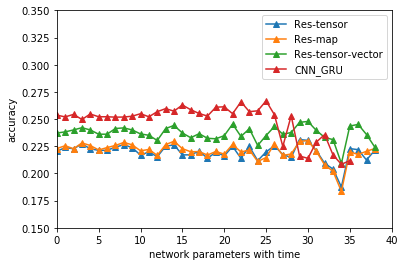

In [94]:

fig = plt.figure()
# plt.title("Mean accuracy of training") 
plt.xlabel("network parameters with time") 
plt.ylabel("accuracy") 
plt.plot(np.arange(len(Res_tensor_acc)),Res_tensor_acc[:,-1], '-^', label='Res-tensor') 
plt.plot(np.arange(len(Res_tensor_map_acc)),Res_tensor_map_acc[:,-1], '-^', label='Res-map') 
plt.plot(np.arange(len(Res_tensor_vector_acc)),Res_tensor_vector_acc[:,-1], '-^', label='Res-tensor-vector') 
plt.plot(np.arange(len(CNN_GRU_acc)),CNN_GRU_acc[:,-1], '-^', label='CNN_GRU') 

plt.axis([0, 40, 0.15, 0.35])
plt.legend(loc='upper center', bbox_to_anchor=(0.8,1),ncol=1,fancybox=True,shadow=False)
# plt.legend()
plt.show()
fig.savefig('acc_parameter.png',format='png')
fig.savefig('acc_parameter.eps',format='eps')

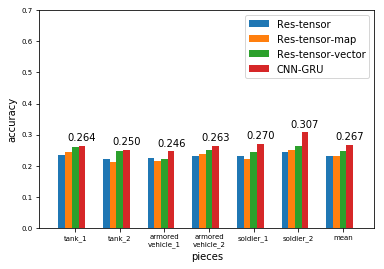

In [138]:
N = 7
fig = plt.figure()
index = np.arange(0, N, 1)

tick_label = ['tank_1','tank_2','armored\nvehicle_1','armored\nvehicle_2','soldier_1','soldier_2','mean']; 
bar_width = 0.15
plt.bar(index , Res_tensor_acc_max, width=bar_width,label='Res-tensor', )
plt.bar(index + bar_width, Res_tensor_map_acc_max, width=bar_width,label='Res-tensor-map' )
plt.bar(index + bar_width*2, Res_tensor_vector_acc_max, width=bar_width,label='Res-tensor-vector',tick_label = tick_label)
plt.bar(index + bar_width*3, CNN_GRU_acc_max, width=bar_width,label='CNN-GRU' )
for a, b in zip(index + bar_width*3, CNN_GRU_acc_max):
    plt.text(a, b + 0.01, '%.3f' % b, ha='center', va='bottom', fontsize=10)

# plt.bar(index + bar_width*4, CNN_GRU_stage_acc_max, width=bar_width,label='CNN_GRU_stage' )
plt.legend() #loc='upper center', bbox_to_anchor=(0.8,0.5),ncol=1,fancybox=True,shadow=False)
plt.xlim(-0.5,7);
plt.ylim(0,0.7);
plt.tick_params(labelsize=7)
plt.xlabel("pieces") 
plt.ylabel("accuracy") 
plt.show()
fig.savefig('acc_piece.png',format='png')
fig.savefig('acc_piece.eps',format='eps')

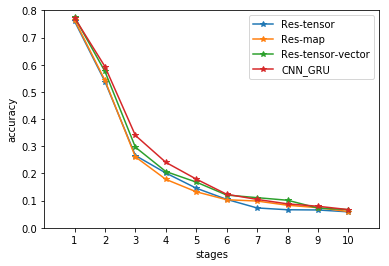

In [98]:

fig = plt.figure()
title_label = ['Tanks_1','Tanks_2','Armored vehicles_1','Armored vehicles_2','Soldiers_1','Soldiers_2']; 

acc1 = np.mean(Res_tensor_acc_n_step, axis=0)
acc2 = np.mean(Res_tensor_map_acc_n_step, axis=0)
acc3 = np.mean(Res_tensor_vector_acc_n_step, axis=0)
acc4 = np.mean(CNN_GRU_acc_n_step, axis=0)

   

plt.xlabel("stages") 
plt.ylabel("accuracy") 
x_index = np.arange(1,11)
plt.plot(x_index, acc1, '*-', label='Res-tensor') 
plt.plot(x_index, acc2, '*-', label='Res-map') 
plt.plot(x_index, acc3, '*-', label='Res-tensor-vector') 
plt.plot(x_index, acc4, '*-', label='CNN_GRU') 

plt.legend()
plt.axis([0, 11, 0, 0.8])
plt.xticks(x_index)
plt.show()
fig.savefig('acc_step.png',format='png')
fig.savefig('acc_step.eps',format='eps')

In [104]:
file_head = '../Baselines/EnemyPositionPrediction/checkpoints'
Res_tensor_result = '/RES_tensor/all/test_pro/test_result'
Res_tensor_map_result = '/RES_tensor_map/all/test_pro/test_result'
Res_tensor_vector_result = '/RES_tensor_vector/all/test_pro/test_result'
CNN_GRU_result = '/CNN_GRU/all/test_pro/test_result'


with open(file_head + Res_tensor_result,'rb') as f:
    Res_tensor_result_file = pickle.load(f)
with open(file_head + Res_tensor_map_result,'rb') as f:
    Res_tensor_map_result_file = pickle.load(f)
with open(file_head + Res_tensor_vector_result,'rb') as f:
    Res_tensor_vector_result_file = pickle.load(f)
with open(file_head + CNN_GRU_result,'rb') as f:
    CNN_GRU_result_file = pickle.load(f)

Res_tensor_x = '/RES_tensor/all/test_pro/test_x_result'
Res_tensor_map_x = '/RES_tensor_map/all/test_pro/test_x_result'
Res_tensor_vector_x = '/RES_tensor_vector/all/test_pro/test_x_result'
CNN_GRU_x = '/CNN_GRU/all/test_pro/test_x_result'

with open(file_head + Res_tensor_x,'rb') as f:
    Res_tensor_x_file = pickle.load(f)
with open(file_head + Res_tensor_map_x,'rb') as f:
    Res_tensor_map_x_file = pickle.load(f)
with open(file_head + Res_tensor_vector_x,'rb') as f:
    Res_tensor_vector_x_file = pickle.load(f)
with open(file_head + CNN_GRU_x,'rb') as f:
    CNN_GRU_x_file = pickle.load(f)


In [105]:
def show_test_pro_result(result, steps=10, offset=0):
    action_pres, action_gts = result
#     print(action_pres)
    ################################## Calc Acc #########################################

    action_pres_np = np.array(action_pres)
#     print(action_pres_np)
    action_gts_np = np.array(action_gts)
#     print(action_pres_np.shape, action_gts_np.shape)
    acc_type = [1,3,5,10,15,50]
    action_acc = []
    for piece in range(6):
        acc_piece = []
        for replay in range(action_pres_np.shape[1]):
            acc_replay = []
            action_pres = action_pres_np[piece, replay]
            action_gts = action_gts_np[piece, replay]
            for i, num in enumerate(acc_type):
                
                acc_replay.append(np.mean([pos in action_pres[j, -num:]
                                           for j, pos in enumerate(action_gts[offset:])]))
            acc_piece.append(acc_replay)
    
        action_acc.append(acc_piece)
    action_acc = np.array(action_acc)
    print(action_acc.shape)
    action_acc = action_acc.mean(axis=1)
    print('\tAction Accuracy: {}\t'.format(action_acc))


#     print(Y, Y[:,0].shape, X.shape)
    
    return action_acc#, Y

In [106]:
Res_tensor_pre = Res_tensor_result_file['action_pre_per_replay']
Res_tensor_gt = Res_tensor_result_file['action_gt_per_replay']
Res_tensor_acc = show_test_pro_result((Res_tensor_pre, Res_tensor_gt), offset=9)

Res_tensor_map_pre = Res_tensor_map_result_file['action_pre_per_replay']
Res_tensor_map_gt = Res_tensor_map_result_file['action_gt_per_replay']
Res_tensor_map_acc = show_test_pro_result((Res_tensor_map_pre, Res_tensor_map_gt), offset=9)

Res_tensor_vector_pre = Res_tensor_vector_result_file['action_pre_per_replay']
Res_tensor_vector_gt = Res_tensor_vector_result_file['action_gt_per_replay']
Res_tensor_vector_acc = show_test_pro_result((Res_tensor_vector_pre, Res_tensor_vector_gt), offset=9)

CNN_GRU_pre = CNN_GRU_result_file['action_pre_per_replay']
CNN_GRU_gt = CNN_GRU_result_file['action_gt_per_replay']
CNN_GRU_acc = show_test_pro_result((CNN_GRU_pre, CNN_GRU_gt), offset=0)

(6, 166, 6)
	Action Accuracy: [[0.22206265 0.33080516 0.40728212 0.51962682 0.58765557 0.78121414]
 [0.1893687  0.32643907 0.39504552 0.49410296 0.5540183  0.74605528]
 [0.1965826  0.31343843 0.38656179 0.50586691 0.57970081 0.77195391]
 [0.21765648 0.3185118  0.38581224 0.49542806 0.56829501 0.77415368]
 [0.20573158 0.31697061 0.38669753 0.50707286 0.5807746  0.77741335]
 [0.23136068 0.33354507 0.3996112  0.50732592 0.58195082 0.79158465]]	
(6, 166, 6)
	Action Accuracy: [[0.22331661 0.33469505 0.40717517 0.51580976 0.58031546 0.75151395]
 [0.19007476 0.32819614 0.39907177 0.49502643 0.55511178 0.73164543]
 [0.18868016 0.30187674 0.37167118 0.49673214 0.56909087 0.75589897]
 [0.21771554 0.3214512  0.39020108 0.49976652 0.56746231 0.74668469]
 [0.19618057 0.3173967  0.38997118 0.51294009 0.58112262 0.76448436]
 [0.23043247 0.34451358 0.40971405 0.51864259 0.59023477 0.76048824]]	
(6, 166, 6)
	Action Accuracy: [[0.2366472  0.33215375 0.39700829 0.50277474 0.57228121 0.76210637]
 [0.20204

In [107]:
Res_tensor_x_pre = Res_tensor_x_file['action_pre_per_replay']
Res_tensor_x_gt = Res_tensor_x_file['action_gt_per_replay']
Res_tensor_x_acc = show_test_pro_result((Res_tensor_x_pre, Res_tensor_x_gt), offset=9)

Res_tensor_map_x_pre = Res_tensor_map_x_file['action_pre_per_replay']
Res_tensor_map_x_gt = Res_tensor_map_x_file['action_gt_per_replay']
Res_tensor_map_x_acc = show_test_pro_result((Res_tensor_map_x_pre, Res_tensor_map_x_gt), offset=9)

Res_tensor_vector_x_pre = Res_tensor_vector_x_file['action_pre_per_replay']
Res_tensor_vector_x_gt = Res_tensor_vector_x_file['action_gt_per_replay']
Res_tensor_vector_x_acc = show_test_pro_result((Res_tensor_vector_x_pre, Res_tensor_vector_x_gt), offset=9)

CNN_GRU_x_pre = CNN_GRU_x_file['action_pre_per_replay']
CNN_GRU_x_gt = CNN_GRU_x_file['action_gt_per_replay']
CNN_GRU_x_acc = show_test_pro_result((CNN_GRU_x_pre, CNN_GRU_x_gt), offset=0)

(6, 166, 6)
	Action Accuracy: [[0.4351698  0.63935696 0.72418591 0.82848852 0.87288295 0.94632586]
 [0.40439231 0.63366808 0.72654656 0.81533816 0.85592405 0.93673297]
 [0.45278036 0.65070545 0.73756332 0.83147744 0.88022447 0.96023974]
 [0.44752546 0.64255806 0.72002484 0.81954702 0.87271706 0.95606832]
 [0.46297712 0.65533349 0.73858739 0.840245   0.88825288 0.97017371]
 [0.4630665  0.65424298 0.72997588 0.82509568 0.87384148 0.95888092]]	
(6, 166, 6)
	Action Accuracy: [[0.42236921 0.62693798 0.7221564  0.81970449 0.86279565 0.93533056]
 [0.38228916 0.61999541 0.71247144 0.8036632  0.84866148 0.93229159]
 [0.41927332 0.63445136 0.71942093 0.82672983 0.87606469 0.95465208]
 [0.4128301  0.61765807 0.70148018 0.80971142 0.8619766  0.94234179]
 [0.4203049  0.63694988 0.72485511 0.82635803 0.87288709 0.94839333]
 [0.43516642 0.62817661 0.70779972 0.81410048 0.86303311 0.94074943]]	
(6, 166, 6)
	Action Accuracy: [[0.43723866 0.61334523 0.69330864 0.79321765 0.837367   0.92694347]
 [0.38721

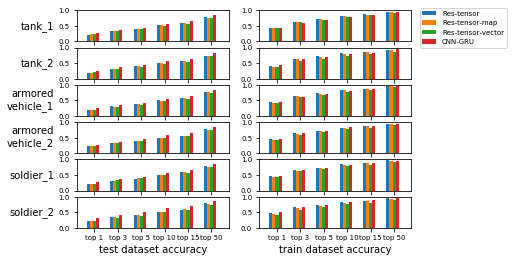

In [143]:


N = 6
fig = plt.figure()
index = np.arange(0, N, 1)
label = ['tank_1','tank_2','armored\nvehicle_1','armored\nvehicle_2','soldier_1','soldier_2']; #,'mean'

for piece in range(6):
    plt.subplot(6, 2, 2*piece+1)
    
    tick_label = ['top 1','top 3','top 5','top 10','top 15','top 50'];
    bar_width = 0.13
    plt.bar(index, Res_tensor_acc[piece], width=bar_width,label='Res-tensor', )
    plt.bar(index + bar_width, Res_tensor_map_acc[piece], width=bar_width,label='Res-tensor-map' )
    plt.bar(index + bar_width*2, Res_tensor_vector_acc[piece], width=bar_width,label='Res-tensor-vector',tick_label = tick_label)
    plt.bar(index + bar_width*3, CNN_GRU_acc[piece], width=bar_width,label='CNN-GRU' )
#     for a, b in zip(index + bar_width*3, CNN_GRU_acc_max):
#         plt.text(a, b + 0.01, '%.3f' % b, ha='center', va='bottom', fontsize=10)

    # plt.bar(index + bar_width*4, CNN_GRU_stage_acc_max, width=bar_width,label='CNN_GRU_stage' )
#     plt.legend() #loc='upper center', bbox_to_anchor=(0.8,0.5),ncol=1,fancybox=True,shadow=False)
    plt.xlim(-0.5,6);
    plt.ylim(0,1);
    plt.tick_params(labelsize=7)
    plt.xlabel("test dataset accuracy") 
#     plt.ylabel(label[piece]) 
    plt.ylabel(label[piece],rotation='horizontal',verticalalignment='center', horizontalalignment='right') #,fontsize, verticalalignment, horizontalalignment, rotation)



    plt.subplot(6, 2, 2*piece+2)
    

    plt.bar(index , Res_tensor_x_acc[piece], width=bar_width,label='Res-tensor', )
    plt.bar(index + bar_width, Res_tensor_map_x_acc[piece], width=bar_width,label='Res-tensor-map' )
    plt.bar(index + bar_width*2, Res_tensor_vector_x_acc[piece], width=bar_width,label='Res-tensor-vector',tick_label = tick_label)
    plt.bar(index + bar_width*3, CNN_GRU_x_acc[piece], width=bar_width,label='CNN-GRU' )
#     for a, b in zip(index + bar_width*3, CNN_GRU_acc_max):
#         plt.text(a, b + 0.01, '%.3f' % b, ha='center', va='bottom', fontsize=10)

    # plt.bar(index + bar_width*4, CNN_GRU_stage_acc_max, width=bar_width,label='CNN_GRU_stage' )
#     plt.tile(tile);
    plt.xlim(-0.5,6);
    plt.ylim(0,1);
    plt.tick_params(labelsize=7)
    plt.xlabel("train dataset accuracy") 
    



#     plt.ylabel("accuracy") 
# plt.legend() #loc='upper center', bbox_to_anchor=(0.8,0.5),ncol=1,fancybox=True,shadow=False)
plt.legend(bbox_to_anchor=(1.65,7.2),ncol=1,fancybox=True,shadow=False, fontsize=7)
plt.show()
fig.savefig('acc_compare.png',format='png')
fig.savefig('acc_compare.eps',format='eps')

In [ ]:
def xiangsu(q):
    """
    # 六角格像素范围确定函数
    :param q: 推演数据中记录的6位整数坐标
    :return: 对应地图六角格六个顶点的六元数组，用于填充对应六角格
    """
    a = q % 10
    b=(q//10)%10
    c=(q//100)%10
    d=(q//1000)%10
    e=(q//10000)%10
    f=(q//100000)%10
    x=a+b*10+c*100
    y=f*10+e
    if (x%2)==0:
        y=2*y*45+13
    else:
        y=(2*y)*45+58
    x=x*26
    #得到x、y，六角格中心坐标
    x1=x-25
    x2=x
    x3=x+25+1
    x4=x+25+1
    x5=x
    x6=x-25
    y1=y-16
    y2=y-28
    y3=y-16
    y4=y+16
    y5=y+28+1
    y6=y+16
    center = (x,y)
    w=[(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),(x6,y6)]
    return center, w


# 画图函数
def plot_position(true_postion, predict_position, map_dir, map_size, result_dir, name, blend_level=0.9, text=None):
    # map_pic = os.path.join('../../data/map/城镇居民地.jpg')  # 地图背景图片目录
    im = Image.open(map_dir)  # 作为背景
    img = im.convert('RGBA')  # 转换为RGBA模式,添加透明度通道,便于透明图像融合
    hex_draw = Image.new('RGBA', img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(hex_draw)  # 引入画笔
    if len(true_postion) != len(predict_position):
        raise Exception('预测位置与真实位置不对应')
    for i, pos in enumerate(true_postion):
        if pos == predict_position[i]:
            (row, col) = cvtFlatten2Offset(pos, map_size[0], map_size[1])
            Int6loc = cvtHexOffset2Int6loc(row, col)
            center, x = xiangsu(Int6loc)
            draw.polygon(x, fill=(0, 255, 0, int(blend_level * 100)))
        else:
            (row, col) = cvtFlatten2Offset(pos, map_size[0], map_size[1])
            Int6loc = cvtHexOffset2Int6loc(row, col)
            center, x = xiangsu(Int6loc)
            draw.polygon(x, fill=(255, 0, 0, int(blend_level * 100)))

            (row, col) = cvtFlatten2Offset(predict_position[i], map_size[0], map_size[1])
            Int6loc = cvtHexOffset2Int6loc(row, col)
            center, x = xiangsu(Int6loc)
            draw.polygon(x, fill=(0, 0, 255, int(blend_level * 100)))
    img = Image.alpha_composite(img, hex_draw)
    del draw
    img.save(os.path.join(result_dir, name + ".png"))  # 保存图像

def plot_position_Flatten(postion_list, map_dir, map_size, result_dir, name, blend_level=0.9, text=None):
    # map_pic = os.path.join('../../data/map/城镇居民地.jpg')  # 地图背景图片目录
    im = Image.open(map_dir)  # 作为背景
    img = im10.convert('RGBA')  # 转换为RGBA模式,添加透明度通道,便于透明图像融合
    hex_draw = Image.new('RGBA', img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(hex_draw)  # 引入画笔

    for i, pos in enumerate(postion_list):
        (row, col) = cvtFlatten2Offset(pos, map_size[0], map_size[1])
        Int6loc = cvtHexOffset2Int6loc(row, col)
        center, x = xiangsu(Int6loc)
        draw.polygon(x, fill=(255, 0, 0, int(blend_level * 100)))

    img = Image.alpha_composite(img, hex_draw)
    del draw
    img.save(os.path.join(result_dir, name + ".png"))  # 保存图像

In [184]:
from PIL import Image,ImageDraw,ImageFont

width=13
height=300#设置分辨率
font_size=300#字体大小
font_style='C:\Windows\Fonts\simhei.ttf'#字体格式

bg_1=(255,165,0)
bg_2=(0,0,128)

#新建一张空白图片
randint=Image.new(mode='RGB',size=(width*5,height),color=(255, 255, 255))
draw=ImageDraw.Draw(randint)
#设置步长
step_r=(bg_2[0]-bg_1[0])/height
step_g=(bg_2[1]-bg_1[1])/height
step_b=(bg_2[2]-bg_1[2])/height
for y in range(0,height):
    bg_r=round(bg_1[0]+step_r*y)
    bg_g=round(bg_1[1]+step_g*y)
    bg_b=round(bg_1[2]+step_b*y)
    for x in range(0,width):
        draw.point((x,y),fill=(bg_r,bg_g,bg_b))

#将字体绘制到图片上
# fnt=ImageFont.truetype(font=font_style,size=font_size)
text = ['-- 0', '-- 0.25','-- 0.50','-- 0.75','-- 1']
[fnt_width,fnt_height]=draw.textsize(text[0],)
# fnt_x=(width-fnt_width)/4
fnt_y=(height-fnt_height)/4
for i in range(5):
    draw.text((width + 5 ,fnt_y * (4-i)),text=text[i],fill='black')

randint.show()
randint.save('lagend.png')
randint.save('lagend.eps')
